In [91]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [102]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression(penalty=None,solver='sag')
lr.fit(X,y)
print(lr.coef_,lr.intercept_)

[[13.51701025  0.99215645]] [8.95950413]


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [105]:
m1 = -(lr.coef_[0][0]/lr.coef_[0][1])
b1 = -(lr.intercept_/lr.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

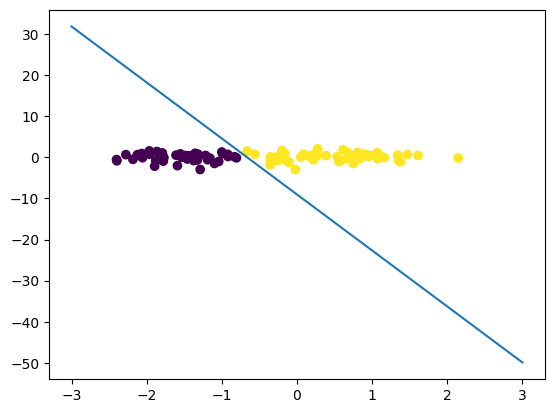

In [106]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.plot(x_input,y_input)

In [107]:
class GDLor:
    def __init__(self,epoch,lr):
        self.epoch = epoch
        self.lr = lr
        self.coef_ = None
        self.intercept_ = None
    def sigmoid(self,val):
        return 1 / (1 + np.exp(-val))
    def fit(self,X,y):
        X = np.insert(X,0,1,axis=1)
        weights = np.ones(X.shape[1])
        m = X.shape[0]
        for i in range(self.epoch):
            y_pred = self.sigmoid(np.dot(X,weights))
            weights = weights + self.lr * (1 / m) * np.dot((y - y_pred),X) 
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]
        print(weights)
    

In [108]:
gdLor = GDLor(50000,0.09)
gdLor.fit(X,y)
print(gdLor.intercept_)

[ 9.42323507 14.21167649  1.0710177 ]
9.423235071029273


In [109]:
m2 = - (gdLor.coef_[0] / gdLor.coef_[1])
b2 = - (gdLor.intercept_/gdLor.coef_[1])
x_input2 = np.linspace(-3,3,100)
y_input2 = m2 * x_input2 + b2

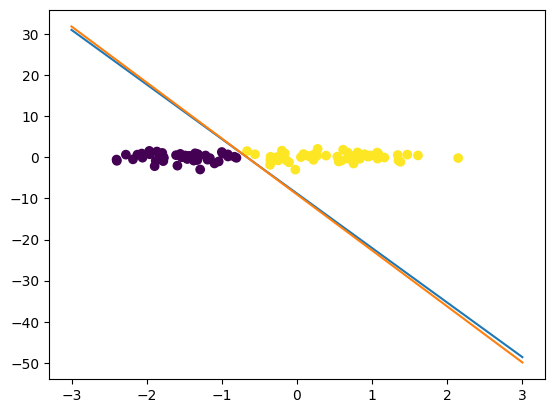

In [110]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.plot(x_input2,y_input2)
plt.plot(x_input,y_input)